In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris['data'][:, (2, 3)]
y = (iris['target'] == 2).astype(np.float64) # Iris Virginica

## Linear Classification

In [3]:
from sklearn.pipeline import Pipeline
from sklearn.svm import LinearSVC
from sklearn.preprocessing import StandardScaler

svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('linear_svc', LinearSVC(C=1, loss='hinge'))
])
svm_clf.fit(X, y)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('linear_svc',
                 LinearSVC(C=1, class_weight=None, dual=True,
                           fit_intercept=True, intercept_scaling=1,
                           loss='hinge', max_iter=1000, multi_class='ovr',
                           penalty='l2', random_state=None, tol=0.0001,
                           verbose=0))],
         verbose=False)

## Nonlinear Classification

### Polynomyal Features

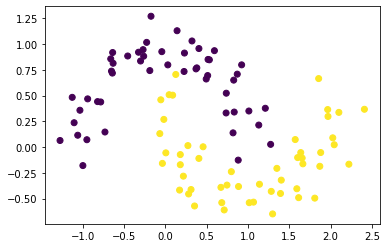

In [4]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.datasets import make_moons
from sklearn.pipeline import Pipeline

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

plt.scatter(X[:, 0], X[:, 1], c=y)
plt.show()

In [5]:
polynomial_svm_clf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(C=10, loss='hinge')),
]).fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/svm/_base.py:947: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


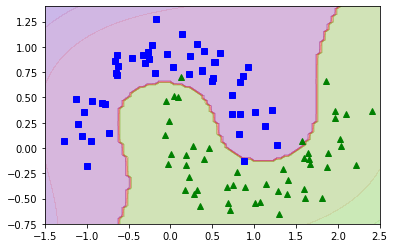

In [11]:
def plot_predictions(clf, axes):
    xxs = np.linspace(axes[0], axes[1], 100)
    yys = np.linspace(axes[2], axes[3], 100)
    xx, yy = np.meshgrid(xxs, yys)
    X = np.c_[xx.ravel(), yy.ravel()]

    y_pred = clf.predict(X).reshape(xx.shape)
    y_decision = clf.decision_function(X).reshape(xx.shape)

    plt.contourf(xx, yy, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(xx, yy, y_decision, cmap=plt.cm.brg, alpha=0.1)

plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
plt.plot(X[y==1, 0], X[y==1, 1], 'g^')
plot_predictions(polynomial_svm_clf, [-2, 2.5, -1, 1.5])

plt.axis([-1.5, 2.5, -0.75, 1.4])
plt.show()

### Polynomial Kernel

In [7]:
from sklearn.svm import SVC

poly_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='poly', degree=3, coef0=1, C=5)),
]).fit(X, y)

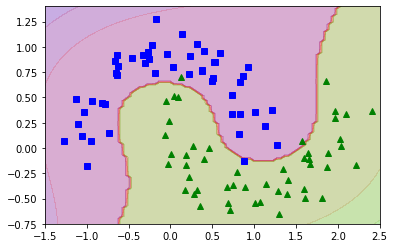

In [8]:
plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
plt.plot(X[y==1, 0], X[y==1, 1], 'g^')
plot_predictions(polynomial_svm_clf, [-2, 2.5, -1, 1.5])

plt.axis([-1.5, 2.5, -0.75, 1.4])
plt.show()

### Gaussian RBF Kernel

In [9]:
from sklearn.svm import SVC

rbf_kernel_svm_clf = Pipeline([
    ('scaler', StandardScaler()),
    ('svm_clf', SVC(kernel='rbf', gamma=5, C=0.001)),
]).fit(X, y)

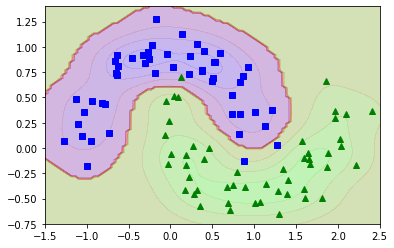

In [12]:
plt.plot(X[y==0, 0], X[y==0, 1], 'bs')
plt.plot(X[y==1, 0], X[y==1, 1], 'g^')
plot_predictions(rbf_kernel_svm_clf, [-2, 2.5, -1, 1.5])

plt.axis([-1.5, 2.5, -0.75, 1.4])
plt.show()

## Regression

### Linear

In [9]:
from sklearn.svm import LinearSVR

X = np.random.rand(100) * 6 - 3
y = 2 * X + 3 + np.random.randn(100)

svm_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', LinearSVR(epsilon=1.5))
]).fit(X.reshape(-1, 1), y)

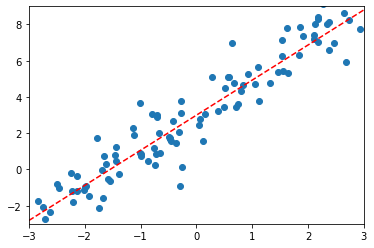

In [10]:
def plot_regression(clf, xmin, ymax, *args, **kwargs):
    X = np.linspace(xmin, ymax, 100).reshape(-1, 1)
    y = clf.predict(X)

    plt.plot(X, y, *args, **kwargs)

plt.scatter(X, y)
plot_regression(svm_reg, -3, 3, 'r--')

plt.axis([-3, 3, -3, 9])
plt.show()

### Polynomial

In [34]:
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

X = np.random.rand(100) * 6 - 3
y = 3 * X**2 + 2 * X + 3 + np.random.randn(100)

poly_svm_reg = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='poly', degree=2, C=10, epsilon=0.1))
]).fit(X.reshape(-1, 1), y)

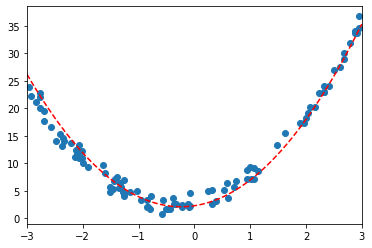

In [35]:
plt.scatter(X, y)
plot_regression(poly_svm_reg, -3, 3, 'r--')

plt.xlim(-3, 3)
plt.show()